In [11]:
#biblioteki
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
import pingouin as pg
from scipy.stats import shapiro

In [12]:
#jak połaczyć dane:
grupa = ['B', 'C', 'B', 'A', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'A', 'A', 'C', 'C', 'B', 'C']
wynik = [4,	5,	5,	3,	4.5,	4,	5,	2,	3.5,	3.5,	3,	3,	4.5,	4,	3,	4,	4.5,	3,	2]
data = pd.DataFrame({'grupa':grupa, 'wynik':wynik})

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00283
Time:                        08:30:38   Log-Likelihood:                 28.722
No. Observations:                  10   AIC:                            -53.44
Df Residuals:                       8   BIC:                            -52.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5687      0.036     43.868      0.0

c:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['alpha']
  warnings.warn(msg, ValueWarning)
c:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


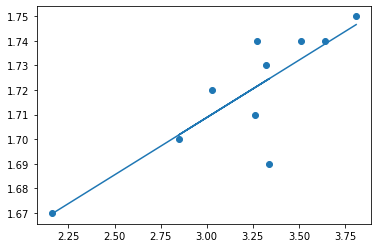

In [13]:
#Regresja
# Wyiczanie regresji:
# H0: Nie ma liniowej zależności między zmiennymi
# H1: Jest liniowa zależność miedzy zmiennymi
x=[2.16, 3.34, 2.85, 3.03, 3.26, 3.27, 3.32, 3.51, 3.64, 3.81]
y=[1.67, 1.69, 1.70, 1.72, 1.71, 1.74, 1.73, 1.74, 1.74, 1.75]
plt.scatter(x,y)
x = sm.add_constant(x) #stworzenie zmiennej
model = sm.OLS(y, x, alpha=0.05).fit() # stwórz dopwasowanie
print(model.summary()) # pokaż wyniki
# x1->a const->b
# y = ax+b
# ODP: Parametry a i b są istotne statystycznie, wiec odrzucamy H0 i przyjmujemy H1
# R-squared-współczynnik determinacji
x=[2.16, 3.34, 2.85, 3.03, 3.26, 3.27, 3.32, 3.51, 3.64, 3.81]
y=[1.67, 1.69, 1.70, 1.72, 1.71, 1.74, 1.73, 1.74, 1.74, 1.75]
for i in range(len(y)):
    y[i] = model.params[1]*x[i] + model.params[0]
plt.plot(x,y)


          n     r         CI95%  p-val       BF10  power
pearson  17  0.96  [0.88, 0.98]    0.0  3.098e+06    1.0
           n    r       CI95%  p-val  power
spearman  17  1.0  [1.0, 1.0]    0.0      1


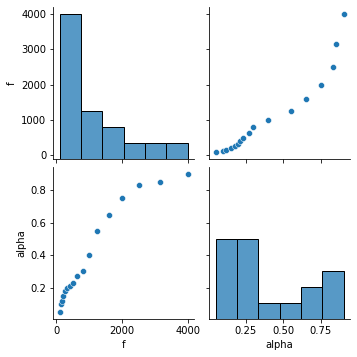

In [14]:
#KOrealcja:
# H0: r = 0, nie ma korrelacji miedzy zmiennymi
# H1: istnieje związek miedzy zmiennymi
f =  [100,	125,	160,	200,	250,	315,	400,	500,	630,	800,	1000,	1250,	1600,	2000,	2500,	3150,	4000]
alpha =  [0.05,	0.1,	0.12,	0.15,	0.18,	0.2,	0.21,	0.23,	0.27,	0.3,	0.4,	0.55,	0.65,	0.75,	0.83,	0.85,	0.9]


n = len(f)
df = {'f':f, 'alpha':alpha}
df1 = pd.DataFrame(data = df)
sns.pairplot(df1)
cor = pg.corr(df1['f'], df1['alpha'], method='pearson', alternative='two-sided').round(2)
r = cor['r']
print(cor)
cor = pg.corr(df1['f'], df1['alpha'], method='spearman', alternative='two-sided').round(2)
print(cor)
# r -> wspólczynnik korelacji
# ODP: Odrzucamy H0 i przyjmujemy H1


In [15]:
#Estymacja przedziałowa dla pearsona:
lista = [r - stats.norm.ppf(0.05/2)*((1-r**2)/np.sqrt(n)), r + stats.norm.ppf(0.05/2)*((1-r**2)/np.sqrt(n))]
print(lista[0], lista[1])
# estymacja przedzialowa pearsona: [0.922, 0.997]

pearson    0.997268
Name: r, dtype: float64 pearson    0.922732
Name: r, dtype: float64


In [16]:
#zależnośc stochastyczna:
# H0: Cechy są niezależne stochastycznie
# H1: Cechy są zależne
grupa = ['B', 'C', 'B', 'A', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'A', 'A', 'C', 'C', 'B', 'C']
wynik = [4,	5,	5,	3,	4.5,	4,	5,	2,	3.5,	3.5,	3,	3,	4.5,	4,	3,	4,	4.5,	3,	2]
data = pd.DataFrame({'grupa':grupa, 'wynik':wynik})
crosstab = pd.crosstab(wynik, grupa)
print(crosstab)
stats.chi2_contingency(crosstab)
# stat, p-value, stopnie swobody
# ODP: p>alpha -> nie ma powodu, by odrzucić H0. Możemy uznac, że zmienne są niezależne


col_0  A  B  C
row_0         
2.0    0  1  1
3.0    2  2  1
3.5    0  1  1
4.0    1  2  1
4.5    0  1  2
5.0    0  2  1


(5.539153439153438,
 0.8523830105143324,
 10,
 array([[0.31578947, 0.94736842, 0.73684211],
        [0.78947368, 2.36842105, 1.84210526],
        [0.31578947, 0.94736842, 0.73684211],
        [0.63157895, 1.89473684, 1.47368421],
        [0.47368421, 1.42105263, 1.10526316],
        [0.47368421, 1.42105263, 1.10526316]]))

20
['Shapiro-Wilk Test: stat=0.927, p=0.137721']
próba pochodzi z populacji o rozkładzie normalnym

5.12885 0.2818501862692305
przedzial sredniej: 4.996940052373865 5.260759947626135
-2.1799668017633618
przedzial var: 0.16946592144666475 0.045943504362799654
0.07943952749999993
blad wzgledny:  1.228806020782392


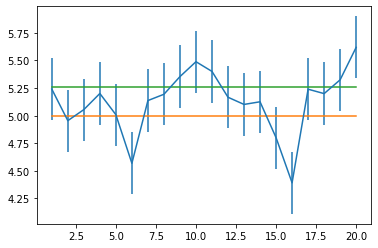

In [50]:
# Estymacja:
from scipy.stats import shapiro
czas = [5.241,	4.955,	5.055,	5.201,	5.009,	4.569,	5.137,	5.194,	5.354,	5.489,	5.401,	5.167,	5.102,	5.126,	4.801,	4.392,	5.24,	5.2,	5.325,	5.619]
n = len(czas)
print(n)
data = np.array(czas)
alpha = 0.05
# n<30
# sprawdzamy normalność
stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>alpha: print('próba pochodzi z populacji o rozkładzie normalnym\n') 
else: print('próba nie pochodzi z populacji o rozkładzie normalnym\n')

m = data.mean()
s = data.std()
var = data.var()
print(m, s)
przedział = [m-stats.t.ppf(1-alpha/2, n-1)*(s/np.sqrt(n)), m+stats.t.ppf(1-alpha/2, n-1)*(s/np.sqrt(n))]
print('przedzial sredniej:',przedział[0], przedział[1])

Bx = (stats.t.ppf(alpha, n-1)*s)/(m*np.sqrt(n-1))*100
print(Bx)
# |B|< 5 -> duża precyzja oszacowania

# estymacja dla wariancji
przedziałvar = [((n-1)*s**2)/stats.chi2.ppf(alpha/2, n-1), ((n-1)*s**2)/stats.chi2.ppf(1-alpha/2, n-1)]
print('przedzial var:',przedziałvar[0], przedziałvar[1])
print(var)

# błąd względny średniej:
d1 = s/np.sqrt(n)
vx = d1/m*100
print('blad wzgledny: ', vx)

# Wizualizacja:
yerror = s
x_values = np.linspace(1,n,n)
y_values = czas
plt.errorbar(x=x_values, y=y_values, yerr=yerror)
plt.plot([1, 20],[przedział[0], przedział[0]])
plt.plot([1, 20],[przedział[1], przedział[1]])